# 2D reference state for shallow-water model
**10 May 2023 by MiniUFO**

---

[TOC]

---

## 1. Introduction
It is well known that 2D inviscid adiabatic shallow-water flow on the spherical earth can be modelled as:

$$
\begin{align}
\frac{\partial \mathbf u}{\partial t}&=-h\mathbf{\hat u}q - \nabla\left(gh+\mathbf u^2/2\right) \tag{1}\\
\frac{\partial h}{\partial t} &=-\nabla\cdot\left(\mathbf uh \right) \tag{2}\\
\end{align}
$$

Here $\mathbf{\hat u}=(-v, u)$ is the anti-clockwise rotation of horizontal velocity vector $\mathbf u$, $q=(\hat\nabla\cdot \mathbf u+f)/h$ is the potential vorticity (PV), and $\hat\nabla = (-\partial_y, \partial_x)$ is the horizontal curl operator.  It is of great importance and interests to get a steady-state solution $S_R=(u_R, v_R, h_R)$ of the above nonlinear equation set so that it satisfies:

$$
\begin{align}
0&=-h\mathbf{\hat u}_Rq_R - \nabla\left(gh_R+\mathbf u_R^2/2\right) \tag{3}\\
0&=-\nabla\cdot\left(\mathbf u_Rh_R \right) \tag{4}\\
\end{align}
$$

That is, when the state of the fluid is in $S_R$, nothing would change in the absence of forcing and dissipation.  One of such steady-state solution is $u_R=0$, $v_R=0$, and $h_R=constant$, which is a trivil motionless state with a flat surface (also known as Lorenz's reference state).  Here we are going to obtained another nontrivil $S_R$.

## 2. Theory
There are infinite solutions that satisfy Eqs. (4-6).  To reduce the degree of freedom, we impose a constraint that $S_R$ is symmetric along $x$.  This means that any derivative along $x$ is 0 and $S_R$ only varies with $y$.  Then Eqs. (4-6) becomes:

$$
\begin{align}
v_R&=0 \tag{7}\\
g\frac{\partial h_R}{\partial y}&=-fu_R+\frac{u_R^2 \sin\phi}{r} \tag{8}\\
\end{align}
$$

The zonal symmetric constraint has eliminate $v_R$, leaving a gradient-wind balance as Eq. (8).

It is well-known that the shallow-water Eqs. (1-3) conserve potential vorticity (PV) $q=(\zeta+f)/h$, which is $dq/dt=0$.  As a result, any functions of PV is conserved.  Two of these functions, total mass $M$ and circulation $C$ enclosed by PV contours, should also conserve:

$$
\begin{align}
M(Q)&=\iint_{q<Q} h dA \tag{9}\\
C(Q)&=\iint_{q<Q} hqdA \tag{10}
\end{align}
$$

Here $Q$ is a set of PV contour values, $M(Q)$ is the total mass enclosed by a contour $Q$, and $C(Q)$ is the circulation around $Q$.  The conservation of Eq. (9) indicates:

$$
\begin{align}
M(Q)&=\iint_{q<Q} h dA= \iint_{q_R<Q} h_R dA = 2\pi r\int h_Rdy\tag{11}
\end{align}
$$

Here $2\pi r$ is the length of latitude circle at $\phi$.  The zonal symmetry of $S_R$ ensures the third equality in Eq. (11), as well as $C=2\pi r(u_R+\Omega r)$.  As a result, we have:

$$
\begin{align}
\frac{\partial M}{\partial y}&=2\pi rh_R\tag{12}
\end{align}
$$

and a modified gradient-wind balance of Eq. (8):

$$
\begin{align}
\frac{\partial }{\partial y}\left(\frac{g}{2\pi r}\frac{\partial M}{\partial y}\right)&=\frac{\sin\phi}{4\pi^2r^3}C^2-\Omega^2r\sin\phi \tag{13}\\
\end{align}
$$

Finally, with the identity $Q\partial M/\partial y=\partial C/\partial y$, we have:

$$
\begin{align}
\frac{\partial }{\partial y}\left(\frac{g}{2\pi rQ}\frac{\partial C}{\partial y}\right)-\frac{\sin\phi}{4\pi^2r^3}C^2&=-\Omega^2r\sin\phi \tag{13}\\
\end{align}
$$

This is a 2nd-order elliptical equation about $C$.  Although it is nonlinear, it can be linearized about $C_0=2\pi r(\overline u+\Omega r)$ as:

$$
\begin{align}
\frac{\partial }{\partial y}\left(\frac{g}{2\pi rQ}\frac{\partial C}{\partial y}\right)-\frac{\sin\phi C_0}{4\pi^2r^3}C&=-\Omega^2r\sin\phi \tag{14}\\
\end{align}
$$

Here $C_0$ is the Eulerian zonal mean circulation, which is treated as a known or a first guess during iteration.  One could first invert Eq. (14) for $C$, and then put the inverted $C$ as $C_0$ for a second inversion loop using Eq. (14).  This is actually a nonlinear iteration loop for inverting Eq. (13).  Since Eq. (13) is weakly nonlinear (i.e., $C$ does not change significantly during iteration), inverting Eq. (14) is also possible by repeating this loop several times.

## 3. Examples
Here we will demonstrate how to use `xinvert` python package to invert Eq. (14), and nonlinear loops for inverting Eq. (13).  First we load a global dataset output from shallow-water model.

In [7]:
import sys
sys.path.append('../../../../')
from xgrads.xgrads import open_CtlDataset

ds = open_CtlDataset('../../../Data/BarotropicData.ctl')

print(ds)

ds.drop_vars(['PV']).to_netcdf('../../../Data/BarotropicData.nc')

<xarray.Dataset>
Dimensions:  (time: 124, lat: 241, lon: 480)
Coordinates:
  * time     (time) datetime64[ns] 2010-01-01 ... 2010-01-31T18:00:00
  * lat      (lat) float32 -90.0 -89.25 -88.5 -87.75 ... 87.75 88.5 89.25 90.0
  * lon      (lon) float32 0.0 0.75 1.5 2.25 3.0 ... 357.0 357.8 358.5 359.2
Data variables:
    u        (time, lat, lon) float32 dask.array<chunksize=(1, 241, 480), meta=np.ndarray>
    v        (time, lat, lon) float32 dask.array<chunksize=(1, 241, 480), meta=np.ndarray>
    h        (time, lat, lon) float32 dask.array<chunksize=(1, 241, 480), meta=np.ndarray>
    zeta     (time, lat, lon) float32 dask.array<chunksize=(1, 241, 480), meta=np.ndarray>
    PV       (time, lat, lon) float32 dask.array<chunksize=(1, 241, 480), meta=np.ndarray>
Attributes:
    comment:  U component of wind
    storage:  99
    title:    ERAInterim
    undef:    -999000000.0
    pdef:     None


In [1]:
import sys
sys.path.append('../../../')
import xarray as xr
import numpy as np

ds = xr.open_dataset('../../../Data/BarotropicData.nc', chunks={'time': 1})
print(ds)

<xarray.Dataset>
Dimensions:  (time: 124, lat: 241, lon: 480)
Coordinates:
  * time     (time) datetime64[ns] 2010-01-01 ... 2010-01-31T18:00:00
  * lat      (lat) float32 -90.0 -89.25 -88.5 -87.75 ... 87.75 88.5 89.25 90.0
  * lon      (lon) float32 0.0 0.75 1.5 2.25 3.0 ... 357.0 357.8 358.5 359.2
Data variables:
    u        (time, lat, lon) float32 dask.array<chunksize=(1, 241, 480), meta=np.ndarray>
    v        (time, lat, lon) float32 dask.array<chunksize=(1, 241, 480), meta=np.ndarray>
    h        (time, lat, lon) float32 dask.array<chunksize=(1, 241, 480), meta=np.ndarray>
    zeta     (time, lat, lon) float32 dask.array<chunksize=(1, 241, 480), meta=np.ndarray>
Attributes:
    comment:  U component of wind
    storage:  99
    title:    ERAInterim
    undef:    -999000000.0
    pdef:     None


We get the PV and plot its global distributions.

C:\ProgramData\anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
C:\ProgramData\anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
C:\ProgramData\anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
C:\ProgramData\anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
C:\Progr

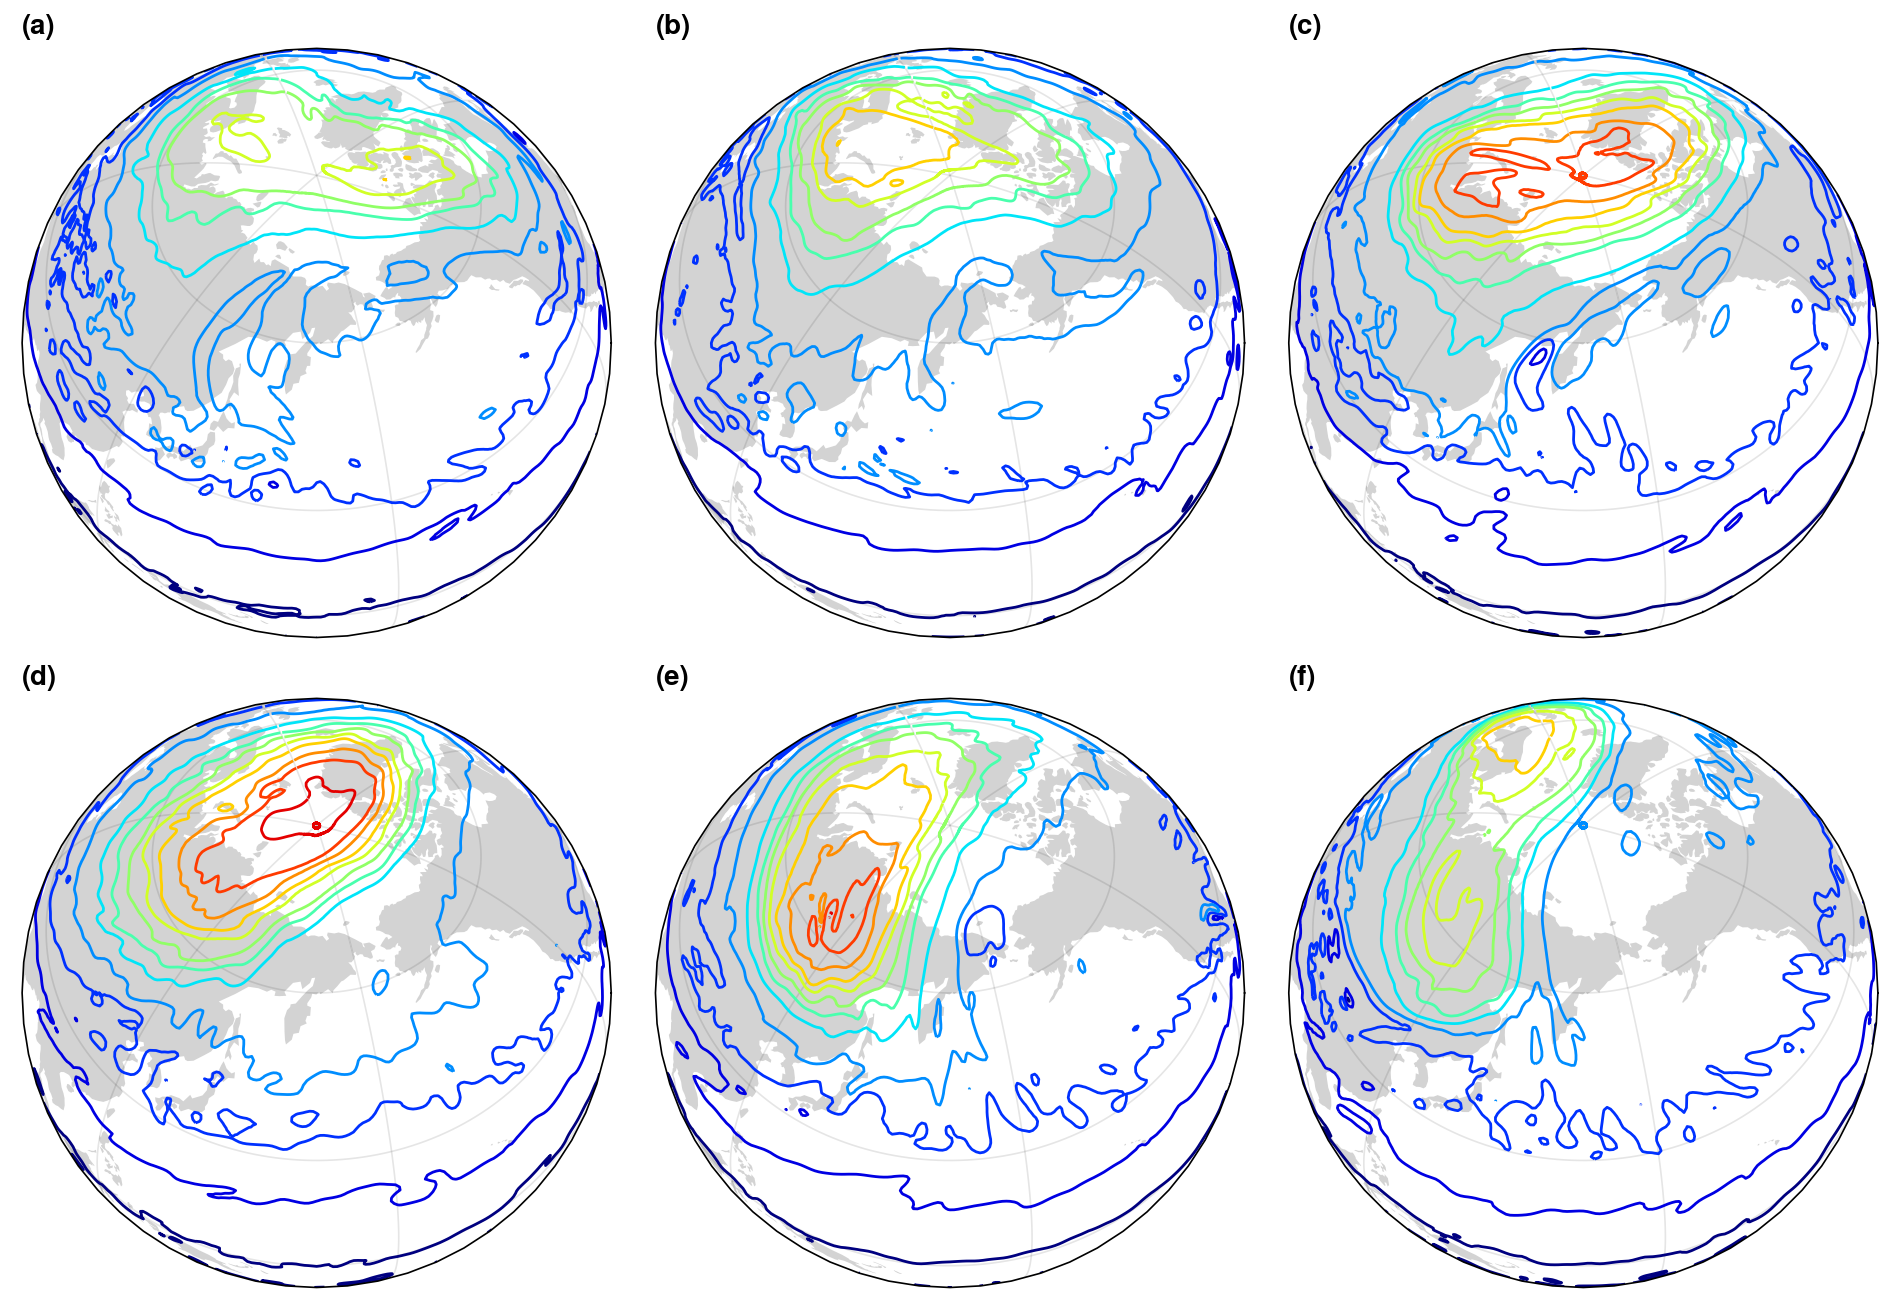

In [2]:
import proplot as pplt
import cartopy.crs as ccrs

PV = (ds.zeta / ds.h).rename('PV') * 1e7 # in PV unit
fontsize = 14

def plot_panel(ax, step):
    m = ax.contour(PV[step], levels=[-0.2, 0, 0.2, 0.4, 0.6, 1, 1.4, 1.8, 2.4, 3, 4, 5, 7, 9], cmap='jet', lw=1)
    return m 

fig, axes = pplt.subplots(nrows=2, ncols=3, figsize=(9.5, 6.5),
                          proj=ccrs.NearsidePerspective(central_latitude=60, central_longitude=165))

plot_panel(axes[0,0], 0)
plot_panel(axes[0,1], 10)
plot_panel(axes[0,2], 50)
plot_panel(axes[1,0], 70)
plot_panel(axes[1,1], 90)
plot_panel(axes[1,2], 120)

axes.format(abc='(a)', land=True, coast=False, landcolor='lightgray')

Now we prepare the data for inversion, including the PV and Eulerian zonal-mean circulation.

In [4]:
import sys
sys.path.append('../../../../')
from xcontour.xcontour import Contour2D, add_latlon_metrics, latitude_lengths_at

# # add metrics for xgcm
dset, grid = add_latlon_metrics(ds)

N  = 121           # increase the contour number may get non-monotonic A(q) relation
increase = True    # Y-index increases with latitude
lt = True          # northward of PV contours (larger than) is inside the contour
                   # change this should not change the result of Keff, but may alter
                   # the values at boundaries
dtype  = np.float32 # use float32 to save memory
undef  = np.nan    # for maskout topography if present
cosLat = np.cos(np.deg2rad(ds.lat))
Omega  = 7.292e-5
a      = 6371200
r      = a * cosLat
f      = 2 * Omega * np.sin(np.deg2rad(ds.lat))
C0     = 2 * np.pi * r * (ds.u.mean('lon') + Omega * r)

# initialize a Contour2D analysis class using PV as the tracer
analysis = Contour2D(grid, PV, dims={'X':'lon','Y':'lat'}, dimEq={'Y':'lat'},
                     increase=increase, lt=lt)
ctr = analysis.cal_contours(N).rename('ctr')

In [10]:
table = analysis.cal_area_eqCoord_table_hist(xr.where(np.isnan(PV[0]), 0, 1).rename('mask')) # A(Yeq) table
area  = analysis.cal_integral_within_contours_hist(ctr).rename('intArea')
Mass  = analysis.cal_integral_within_contours_hist(ctr, integrand=ds.h).rename('Mass')
Circ  = analysis.cal_integral_within_contours_hist(ctr, integrand=ds.zeta).rename('Circ')
latEq = table.lookup_coordinates(area).rename('latEq')

C:\ProgramData\anaconda3\lib\site-packages\dask\array\core.py:1701: FutureWarning: The `numpy.interp` function is not implemented by Dask array. You may want to use the da.map_blocks function or something similar to silence this warning. Your code may stop working in a future release.
  warnings.warn(


---

### References
1. Bretherton, F. P., and D. Haidvogel, 1976: [Two-dimensional turbulence above topography](https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/twodimensional-turbulence-above-topography/839ED65E9B6684B5D6CFEFBD8108A82E). *J. Fluid Mech.*, **78**, 129-154.